# Abstract

A random forest is a meta estimator that fits a number of decision tree classifiers or regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  
The fundamental idea behind a random forest is to **combine many decision trees into a single model**. Individually, predictions made by decision trees may not be accurate, but combined together, **the predictions will be closer to the mark on average**.

# Theory

Random forest is **constructed by many decision trees, and their trees use random sample data sets individually**.
Note, there data is sampled from origin features randomly and this way   forgive duplication. So, some data may be not used . Not used data is called **OOB (Out of Bag)**.  

These process is called as **bootstrap sampling (bagging)**. Bootstrap sampling increases diversity in the forest leading to more robust overall predictions.  


# Boruta

https://aotamasaki.hatenablog.com/entry/2019/01/05/195813

# Imprementation

## Basics

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

In [2]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75)

In [3]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

C:\Users\Tamura Hideto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RMSE :  4.178900130322882


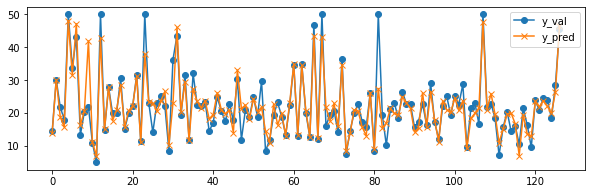

In [4]:
y_pred = model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : ', rmse)

fig, ax = plt.subplots(facecolor='w', figsize=(10,3))
ax.plot(y_val, marker = 'o', label='y_val')
ax.plot(y_pred, marker = 'x', label='y_pred')
ax.legend()
plt.show()

[0.03756479 0.00127232 0.00216744 0.0006918  0.04292039 0.42650773
 0.00997879 0.06474349 0.00197531 0.01152779 0.0189648  0.01093523
 0.37075012]


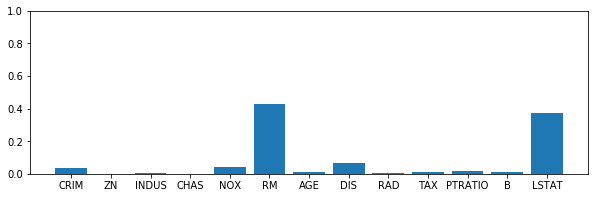

In [5]:
feature_importances = model.feature_importances_
print(feature_importances)

plt.figure(figsize=(10, 3))
plt.ylim([0, 1])
y = feature_importances
x = np.arange(len(y))
plt.bar(x, y, align="center")
plt.xticks(x, boston['feature_names'])
plt.show()

## Advances

### PCA approach

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

In [7]:
from sklearn.decomposition import PCA

In [8]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75)

explained variance ratio: [8.08960268e-01 1.61491475e-01 2.00999542e-02 6.66198069e-03
 1.32533285e-03 7.05697230e-04 3.99321030e-04 2.43461918e-04
 7.80311078e-05 2.74141640e-05 5.49798338e-06 1.49527977e-06
 7.02126988e-08]


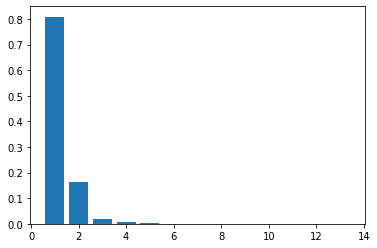

In [9]:
pca = PCA(n_components=13)
pca.fit(x_train)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

In [10]:
pca = PCA(n_components=5)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)
print(x_train_pca.shape)

(379, 5)


In [11]:
model = RandomForestRegressor()
model.fit(x_train_pca, y_train)

C:\Users\Tamura Hideto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RMSE :  7.242078430947846


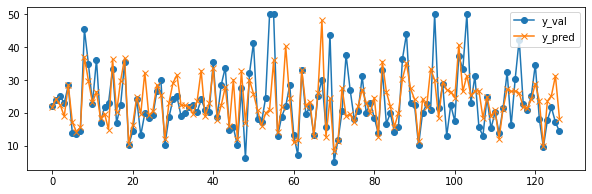

In [12]:
y_pred = model.predict(x_val_pca)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : ', rmse)

fig, ax = plt.subplots(facecolor='w', figsize=(10,3))
ax.plot(y_val, marker = 'o', label='y_val')
ax.plot(y_pred, marker = 'x', label='y_pred')
ax.legend()
plt.show()

### Boruta approach

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

In [14]:
from boruta import BorutaPy

ModuleNotFoundError: No module named 'boruta'

In [ ]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75)

In [15]:
model = RandomForestRegressor()
feat_selector = BorutaPy(
    model,
    n_estimators='auto',
    alpha=0.05,
    two_step= True,
    verbose=2,
#     random_state=42,
    perc=80,
    max_iter=150
)
feat_selector.fit(x_train, y_train)

x_train_selected = x_train[:, feat_selector.support_]
x_val_selected = x_val[:, feat_selector.support_]

NameError: name 'BorutaPy' is not defined

In [16]:
model.fit(x_train_selected, y_train)

NameError: name 'x_train_selected' is not defined

In [17]:
y_pred = model.predict(x_val_selected)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : {}'.format(rmse))

fig, ax = plt.subplots(facecolor='w', figsize=(10,3))
ax.plot(y_val, marker = 'o', label='y_val')
ax.plot(y_pred, marker = 'x', label='y_pred')
ax.legend()
plt.show()

NameError: name 'x_val_selected' is not defined

### Optuna approach

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [20]:
import optuna

ModuleNotFoundError: No module named 'optuna'

In [21]:
def objective(trial):
#     min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    n_estimators = trial.suggest_int("n_estimators", 10, 100)
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
    model = RandomForestRegressor(
#         min_samples_split=min_samples_split,
        n_estimators=n_estimators
#         criterion=criterion
    )
    
    kf = KFold(5, shuffle=True, random_state=1).get_n_splits(x_train)
    scores = cross_validate(model, x_train, y_train, cv=kf, verbose=0)
    
    return scores['test_score'].mean()

In [22]:
study = optuna.create_study()
study.optimize(func=objective,
               n_trials=100, 
               timeout=None, 
               n_jobs=-1
              )

NameError: name 'optuna' is not defined

In [23]:
model_tuned = RandomForestRegressor(min_samples_split=2,
                                                                           n_estimators=10)
model_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RMSE : 3.078648338240531


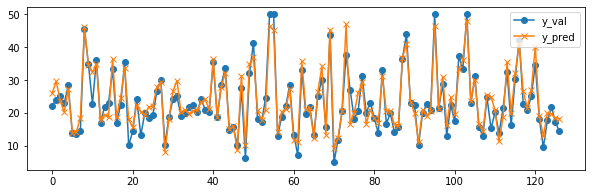

In [24]:
y_pred = model_tuned.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : {}'.format(rmse))

fig, ax = plt.subplots(facecolor='w', figsize=(10,3))
ax.plot(y_val, marker = 'o', label='y_val')
ax.plot(y_pred, marker = 'x', label='y_pred')
ax.legend()
plt.show()

# References

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
https://funatsu-lab.github.io/open-course-ware/machine-learning/random-forest/  
